## Canny Edge Detection

Goal

In this notebook, we will learn about

        Concept of Canny edge detection
        OpenCV functions for that : cv2.Canny()

Theory

Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.

#### 1. Noise Reduction

Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. We have already seen this in previous chapters.

#### 2. Finding Intensity Gradient of the Image

Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction (G_x) and vertical direction (G_y). From these two images, we can find edge gradient and direction for each pixel

**Note:** Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions

In [2]:
#import required modeules
import cv2
import numpy as np
import matplotlib.pyplot as plt


#### 3. Non-maximum Suppression

After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient.

#### 4. Hysteresis Thresholding

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded.

**OpenCV** puts all the above in single function, **cv2.Canny()**. We will see how to use it. First argument is our input image. Second and third arguments are our **minVal** and **maxVal** respectively. Third argument is **aperture_size**. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is **L2gradient** which specifies the equation for finding gradient magnitude. If it is **True**, it uses the equation of gradient which is more accurate, otherwise it uses this function: **Edge\_Gradient \; (G) = |G_x| + |G_y|**. By default, it is **False**.

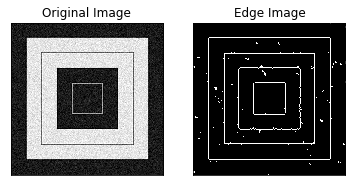

In [3]:
img = cv2.imread('gausian.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


###### Exercises

- Write a small application to find the Canny edge detection whose threshold values can be varied using two trackbars. This way, you can understand the effect of threshold values.

